## Logistic Regression

In [26]:
from gensim.models import Word2Vec
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from joblib import dump


##### Calculating average words vector of a sentence

In [27]:
# Load the pre-trained Word2Vec model
word2vec_model = Word2Vec.load("../models/kurdish-word2vec-75279.model")

def get_average_word_vector(sentence, model, num_features):
    words = sentence.split()
    feature_vector = np.zeros((num_features,), dtype="float32")
    num_words = 0
    for word in words:
        if word in model.wv.key_to_index:
            num_words += 1
            feature_vector = np.add(feature_vector, model.wv[word])
    return feature_vector / num_words if num_words > 0 else feature_vector

##### Loading dataset, getting average word vector of rows and splitting into test and trin data

In [28]:
dataset_path = '../data/translated/kurdish-reviews9.csv'
df = pd.read_csv(dataset_path)
X = df['KurdishText'].astype(str)
y = df['Score']

X_vectors = np.array([get_average_word_vector(text, word2vec_model, 100) for text in X])

X_train, X_test, y_train, y_test = train_test_split(X_vectors, y, test_size=0.2, random_state=42)

#### Using logistic regression to train on the data and printing the accuracy score

In [29]:
# Initialize and train the classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
logistic_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {logistic_accuracy:.2f}")

Accuracy: 0.66


##### Saving the trained model to a file

In [30]:
model_filename = '../models/sentiment_models/logistic_regression_model.joblib'
dump(clf, model_filename)
print(f"Model saved to {model_filename}")

Model saved to ../models/sentiment_models/logistic_regression_model.joblib


##### Testing the model and getting a predicted score class

In [31]:
new_text = "بە دڵم نەبوو"
new_vector = get_average_word_vector(new_text, word2vec_model, 100)  # Convert new text to vector
prediction = clf.predict([new_vector])  # Predict with the classifier
print("Predicted class:", prediction)

Predicted class: [2]


## Support Vector Machine

##### Training SVM on the previously split data and printing the accuracy

In [20]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {svm_accuracy:.2f}")

Accuracy: 0.65


##### Saving the SVM model to file

In [21]:
svm_model_filename = '../models/sentiment_models/svm_model.joblib'
dump(svm, svm_model_filename)
print(f"Model saved to {svm_model_filename}")

Model saved to ../models/sentiment_models/svm_model.joblib


# Random Forest

##### Training Random Forest on the previously split data and printing the accuracy

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {rf_accuracy:.2f}")

Accuracy: 0.69


##### Plotting accuracy difference between models

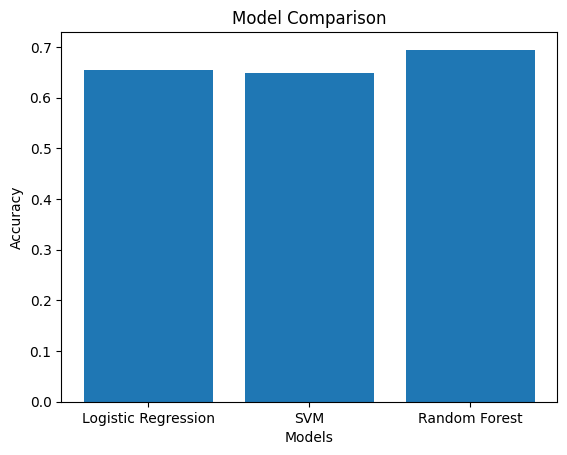

In [25]:
models = ['Logistic Regression', 'SVM',"Random Forest"]
accuracy_scores = [logistic_accuracy, svm_accuracy,rf_accuracy]
plt.bar(models, accuracy_scores)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()

##### Testing models

In [41]:
new_text = "باشترین کتێبەکە کە خوێندبێتمەوە بەڵام چەند کێشەیەکی هەیە"
new_vector = get_average_word_vector(new_text, word2vec_model, 100)  
lr_prediction = clf.predict([new_vector])  
svm_prediction = svm.predict([new_vector])  
rf_prediction = rf.predict([new_vector])  
print("LR Predicted class:", lr_prediction)
print("SVM Predicted class:", svm_prediction)
print("RF Predicted class:", rf_prediction)

LR Predicted class: [5]
SVM Predicted class: [5]
RF Predicted class: [5]
